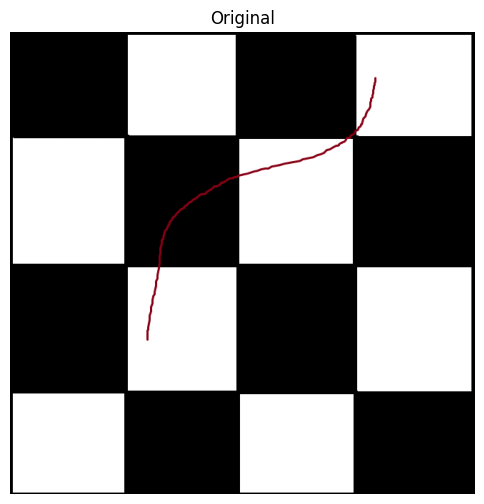

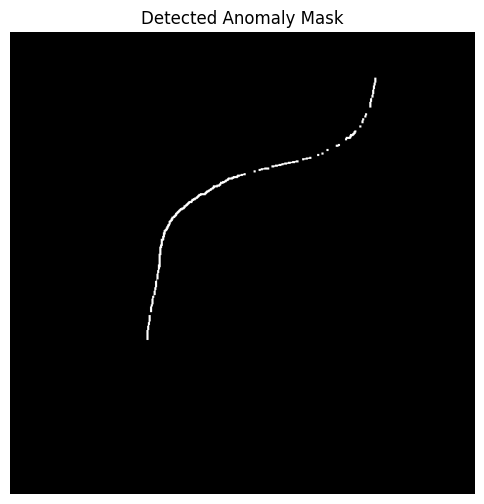

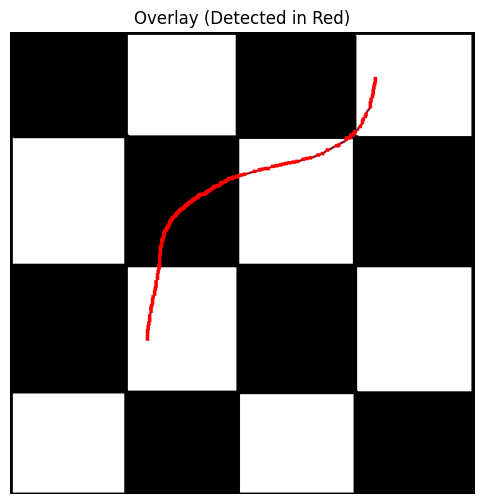

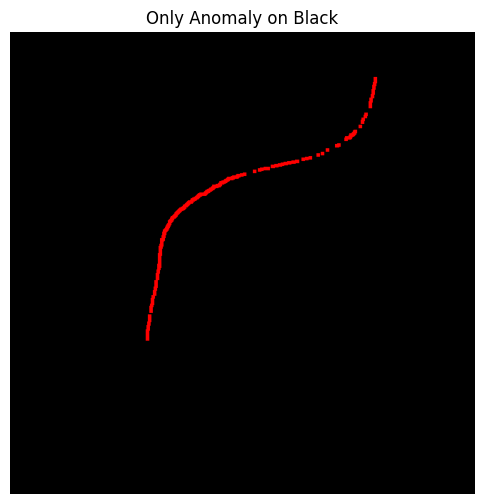

In [4]:
import cv2 as cv
import numpy as np
from PIL import Image
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

IMG_PATH ='1234.png' 
CONTAMINATION = 0.004

img = Image.open(IMG_PATH).convert("RGB")
rgb = np.array(img)                
H, W, _ = rgb.shape

hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV).astype(np.float32)
hsv[..., 0] /= 179.0
hsv[..., 1] /= 255.0 
hsv[..., 2] /= 255.0 

X = hsv.reshape(-1, 3)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso = IsolationForest(
    n_estimators=200,
    contamination=CONTAMINATION,
    random_state=42,
    n_jobs=-1
)
iso.fit(X_scaled)

pred = iso.predict(X_scaled)          
mask = (pred == -1).reshape(H, W).astype(np.uint8) * 255

kernel = np.ones((3, 3), np.uint8)
mask_clean = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=1)
mask_clean = cv.morphologyEx(mask_clean, cv.MORPH_CLOSE, kernel, iterations=1)

mask_vis = cv.dilate(mask_clean, kernel, iterations=1)

overlay = rgb.copy()
overlay[mask_vis > 0] = [255, 0, 0]    

only_anomaly = np.zeros_like(rgb)
only_anomaly[mask_vis > 0] = [255, 0, 0]

plt.figure(figsize=(6, 6))
plt.imshow(rgb); plt.title("Original"); plt.axis("off"); plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mask_clean, cmap="gray"); plt.title("Detected Anomaly Mask"); plt.axis("off"); plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(overlay); plt.title("Overlay (Detected in Red)"); plt.axis("off"); plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(only_anomaly); plt.title("Only Anomaly on Black"); plt.axis("off"); plt.show()
